# <center><font color=red>[Learning SciPy for Numerical and Scientific Computing - Second Edition](https://www.packtpub.com/big-data-and-business-intelligence/learning-scipy-numerical-and-scientific-computing-second-edition)</font></center>

>###Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License)2015 Sergio Rojas (srojas@usb.ve) and Erik A Christensen (erikcny@aol.com).###

<b><font color='red'>
    NOTE: This IPython notebook should be read alonside the corresponding chapter in the book, where each piece of code is fully explained.
    </font></b>
<br>

# <center>Chapter 7.  SciPy for Computational Geometry</center>

##Summary##

This chapter explores the construction of triangulation of points, convex hulls, Voronoi diagrams, and many applications. At this point in the book, it will be possible to combine techniques from all the previous chapters to show state-of-the-art research performed with ease with SciPy, and we will explore a few good examples from Material Sciences and Experimental Physics.


>[General Documentation](http://docs.scipy.org/doc/)

>[Spatial data structures and algorithms (scipy.spatial)](http://docs.scipy.org/doc/scipy-dev/reference/tutorial/spatial.html)

>[scipy.spatial.Delaunay](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.Delaunay.html)

>[scipy.spatial.Voronoi](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.Voronoi.html)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import scipy.stats
import scipy.spatial

In [3]:
data = scipy.stats.randint.rvs(0.4,10,size=(10,2))
triangulation = scipy.spatial.Delaunay(data)

In [4]:
#locations=scipy.stats.randint.rvs(0,511,size=(2,8))
from numpy.random import RandomState
rv = RandomState(123456789)
locations = rv.randint(0, 511, size=(2,8))
triangulation=scipy.spatial.Delaunay(locations.T)

In [5]:
assign_vertex = lambda index: triangulation.points[index]
triangle_set = map(assign_vertex, triangulation.vertices)

/home/srojas/myProg/CANOPY151/ENV/User/lib/python2.7/site-packages/matplotlib/tri/triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)


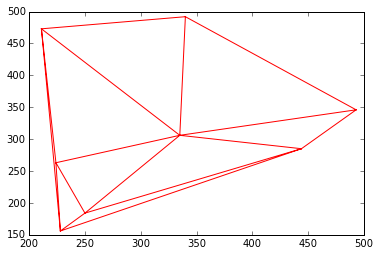

In [6]:
plt.triplot(locations[1], locations[0], triangles=triangle_set, color='r')

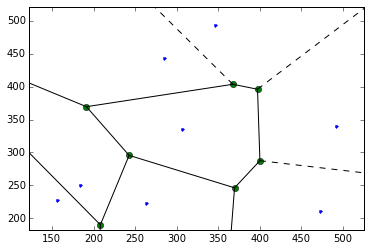

In [7]:
voronoiSet=scipy.spatial.Voronoi(locations.T)
scipy.spatial.voronoi_plot_2d(voronoiSet)
plt.show()

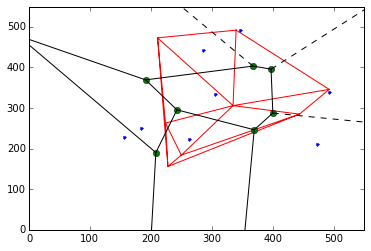

In [8]:
fig = plt.figure()
thefig = plt.subplot(1,1,1)
scipy.spatial.voronoi_plot_2d(voronoiSet, ax=thefig)
plt.triplot(locations[1], locations[0], triangles=triangle_set, color='r')
plt.xlim((0,550))
plt.ylim((0,550))
plt.show()

## Structural model of oxides

In [9]:
import numpy
import scipy
from scipy.ndimage import *
from scipy.misc import imfilter
import matplotlib.cm as cm

In [10]:
img=imread('./NbW-STEM.png')

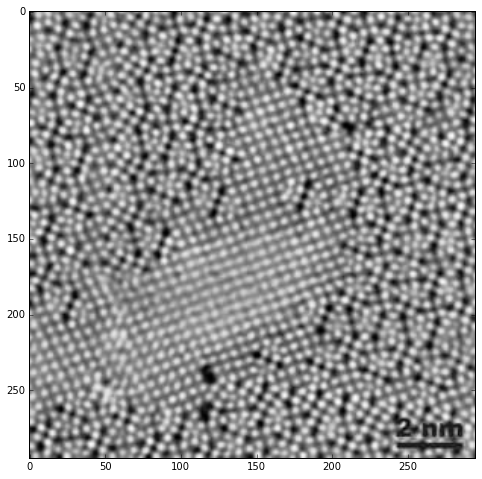

In [11]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
img=imread('./NbW-STEM.png')
minVal = numpy.min(img) 
maxVal = numpy.max(img) 
img = (1.0/(maxVal-minVal))*(img - minVal) 
plt.imshow(img, cmap = cm.Greys_r)
plt.show()

In [12]:
print(img)

[[ 0.42745098  0.35686275  0.29019608 ...,  0.54117647  0.5372549
   0.50980392]
 [ 0.36862745  0.3372549   0.32156863 ...,  0.41176471  0.35686275
   0.30588235]
 [ 0.24705882  0.25490196  0.30588235 ...,  0.36470588  0.25098039
   0.17254902]
 ..., 
 [ 0.29803922  0.38039216  0.50588235 ...,  0.39215686  0.26666667
   0.18039216]
 [ 0.28627451  0.38039216  0.52941176 ...,  0.4         0.25490196
   0.16078431]
 [ 0.28235294  0.37647059  0.5254902  ...,  0.42352941  0.27058824
   0.16470588]]


In [13]:
print("Image dtype: %s"%(img.dtype))
print("Image size: %6d"%(img.size))
print("Image shape: %3dx%3d"%(img.shape[0],img.shape[1]))
print("Max value %1.2f at pixel %6d"%(img.max(),img.argmax()))
print("Min value %1.2f at pixel %6d"%(img.min(),img.argmin()))
print("Variance: %1.5f\nStandard deviation: %1.5f"%(img.var(),img.std()))

Image dtype: float64
Image size:  87025
Image shape: 295x295
Max value 1.00 at pixel  75440
Min value 0.00 at pixel   5703
Variance: 0.02580
Standard deviation: 0.16063


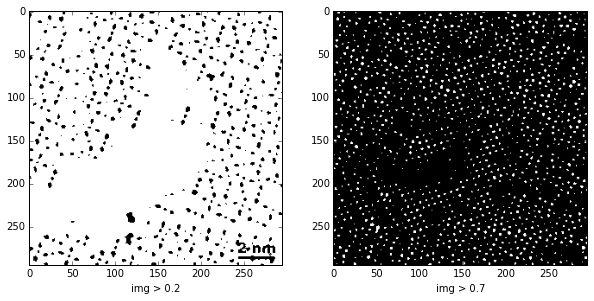

In [14]:
plt.subplot(1, 2, 1) 
plt.imshow(img > 0.2, cmap = cm.Greys_r) 
plt.xlabel('img > 0.2') 
plt.subplot(1, 2, 2) 
plt.imshow(img > 0.7, cmap = cm.Greys_r) 
plt.xlabel('img > 0.7') 
plt.show() 

In [15]:
BWatoms = (img> 0.62)
BWatoms = binary_opening(BWatoms,structure=numpy.ones((2,2)))

In [16]:
structuring_element = [[0,1,0],[1,1,1],[0,1,0]]
segmentation,segments = label(BWatoms,structuring_element)

In [17]:
coords  = center_of_mass(img, segmentation, range(1,segments+1))
xcoords = numpy.array([x[1] for x in coords])
ycoords = numpy.array([x[0] for x in coords])

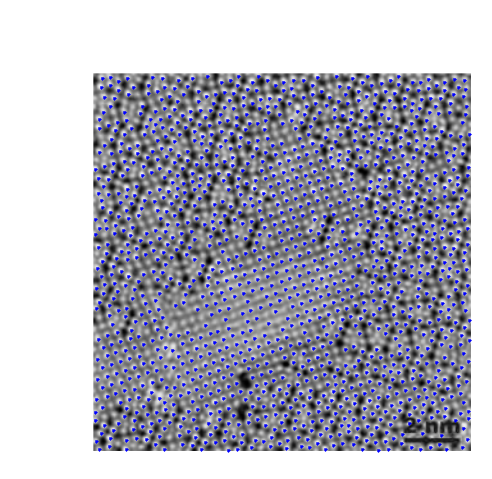

In [18]:
plt.imshow(img, cmap = cm.Greys_r) 
plt.axis('off') 
plt.plot(xcoords,ycoords,'b.') 
plt.show() 

In [19]:
L1,L2 = distance_transform_edt(segmentation==0,
return_distances=False,
return_indices=True)
Voronoi = segmentation[L1,L2]
Voronoi_edges= imfilter(Voronoi,'find_edges')
Voronoi_edges=(Voronoi_edges>0)

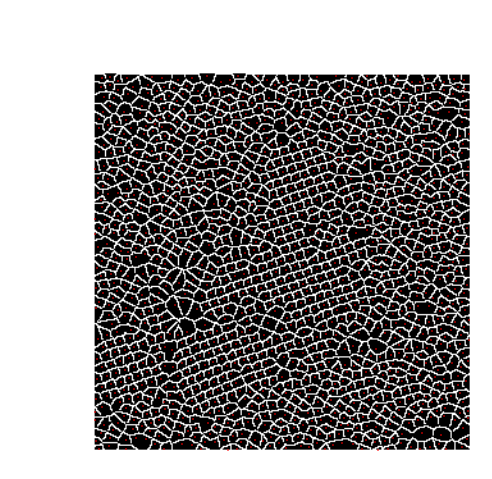

In [20]:
plt.imshow(Voronoi_edges); 
plt.axis('off'); 
plt.gray()
plt.plot(xcoords,ycoords,'r.',markersize=2.0)
plt.show()

## A finite element solver for Laplace's equation

>[Sparse matrices (scipy.sparse)](http://docs.scipy.org/doc/scipy-0.14.0/reference/sparse.html)

>[Sparse Matrices in SciPy](https://scipy-lectures.github.io/advanced/scipy_sparse/)

>[The FEniCS Book: Automated Solution of Differential Equations by the Finite Element Method](http://fenicsproject.org/book/index.html#book)

>[FEniCS tutorial (Python)](http://fenicsproject.org/documentation/tutorial/)

>[SfePy: Simple Finite Elements in Python](http://sfepy.org/doc-devel/index.html)

In [21]:
import numpy
from numpy import linspace
import scipy
from scipy.spatial import Delaunay
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 10.0)

In [22]:
xmin = 0 ; xmax = 1 ; nXpoints = 10
ymin = 0 ; ymax = 1 ; nYpoints = 10
horizontal = linspace(xmin,xmax,nXpoints)
vertical = linspace(ymin,ymax,nYpoints) 
y, x = numpy.meshgrid(horizontal, vertical) 
vertices = numpy.array([x.flatten(),y.flatten()]) 

In [23]:
triangulation = Delaunay(vertices.T)
index2point = lambda index: triangulation.points[index]
all_centers = index2point(triangulation.vertices).mean(axis=1)
trngl_set=triangulation.vertices

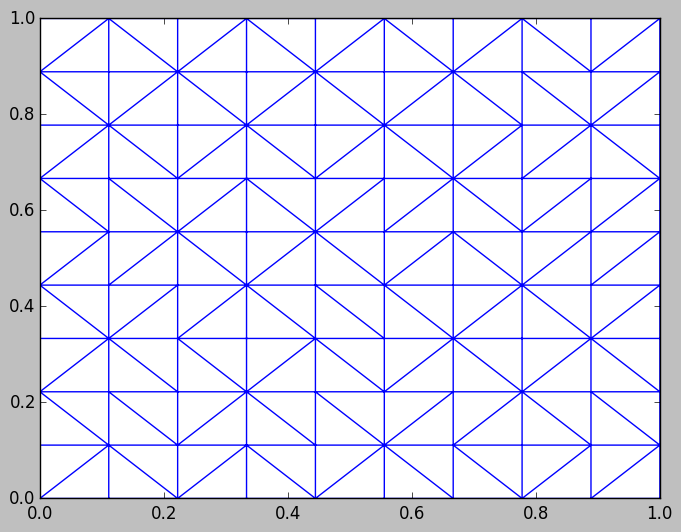

In [24]:
plt.rcdefaults()
plt.triplot(vertices[0],vertices[1],triangles=trngl_set)
plt.show()

<b> This is the problem formulation</b>

## $$\boxed{ \begin{equation} \left\{   \begin{aligned}     \nabla^{2} \phi(x,y) & =0 \\     \phi(x=0,y)=0; \,\, \phi(x=1, y) &= 1;  \, y \ne 0 \text{ and } y \ne 1  \\     \phi(x,y=0)=\phi(x,y=1) & =0     \end{aligned}    \right. \end{equation} }$$

<b>This is the solution</b>

## $$\boxed{ \begin{equation} \phi(x,y) = 2 \sum\limits_{n=1}^{\infty}  \left[\frac{1}{n\pi} -                 \frac{\cos(n\pi)}{n\pi}\right]                 \frac{\sinh(n\pi x)}{\sinh(n\pi)} \sin(n\pi y)  \end{equation} }$$

In [25]:
from numpy import  cross 
from scipy.sparse import dok_matrix 
points=triangulation.points.shape[0]
stiff_matrix=dok_matrix((points,points))

In [26]:
for triangle in triangulation.vertices:
    helper_matrix=dok_matrix((points,points))
    pt1,pt2,pt3=index2point(triangle)
    area=abs(0.5*cross(pt2-pt1,pt3-pt1))
    coeffs=0.5*numpy.vstack((pt2-pt3,pt3-pt1,pt1-pt2))/area
    #helper_matrix[triangle,triangle]=array(mat(coeffs)*mat(coeffs).T)
    u=None 
    u=numpy.array(numpy.mat(coeffs)*numpy.mat(coeffs).T) 
    for i in range(len(triangle)): 
        for j in range(len(triangle)): 
            helper_matrix[triangle[i],triangle[j]] = u[i,j] 
    stiff_matrix=stiff_matrix+helper_matrix

In [27]:
allNodes = numpy.unique(trngl_set) 
boundaryNodes = numpy.unique(triangulation.convex_hull) 
NonBoundaryNodes = numpy.array([]) 
for x in allNodes: 
  if x not in boundaryNodes: 
     NonBoundaryNodes = numpy.append(NonBoundaryNodes,x) 
NonBoundaryNodes = NonBoundaryNodes.astype(int) 
nbnodes = len(boundaryNodes) # number of boundary nodes 
FbVals=numpy.zeros([nbnodes,1]) # Values on the boundary 
FbVals[(nbnodes-nXpoints+1):-1]=numpy.ones([nXpoints-2, 1])


In [28]:
totalNodes = len(allNodes) 
stiff_matrixDense = stiff_matrix.todense() 
stiffNonb = stiff_matrixDense[numpy.ix_(NonBoundaryNodes,NonBoundaryNodes)] 
stiffAtb = stiff_matrixDense[numpy.ix_(NonBoundaryNodes,boundaryNodes)] 
U=numpy.zeros([totalNodes, 1]) 
U[NonBoundaryNodes] = numpy.linalg.solve( - stiffNonb , stiffAtb * FbVals ) 
U[boundaryNodes] = FbVals 

In [29]:
X = vertices[0] 
Y = vertices[1] 
Z = U.T.flatten() 

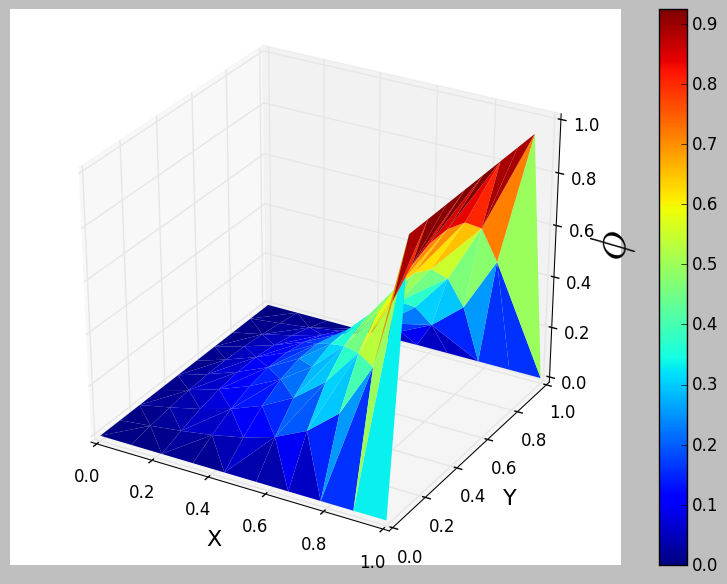

In [30]:
plt.rcdefaults()
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.jet, linewidth=0) 
fig.colorbar(surf) 
fig.tight_layout() 
ax.set_xlabel('X',fontsize=16)
ax.set_ylabel('Y',fontsize=16)
ax.set_zlabel(r"$\phi$",fontsize=36)
plt.show() 

In [31]:
from numpy import pi, sinh, sin, cos, sum
def f(x,y): 
   return sum( 
      2*(1.0/(n*pi) - cos(n*pi)/(n*pi))*(sinh(n*pi*x)/sinh(n*pi))*sin(n*pi*y) 
                for n in range(1,200)) 

<b>The following plot shows the difference between the exact solution and the numerical one</b>

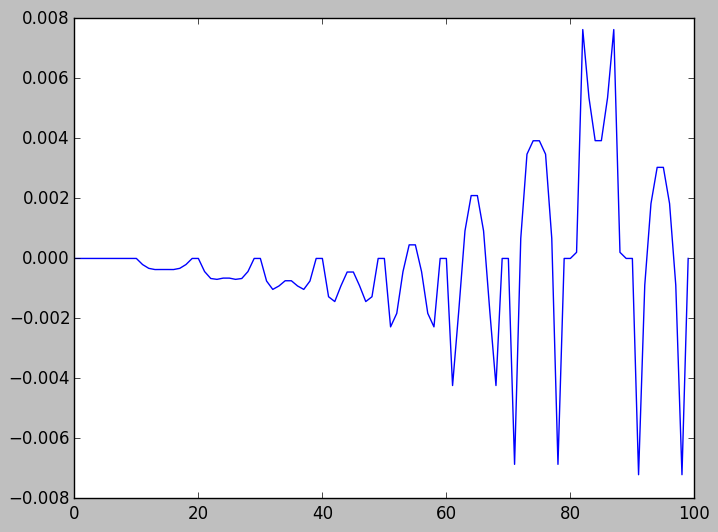

In [32]:
Ze = f(X,Y) 
ZdiffZe = Ze - Z 
plt.plot(ZdiffZe) 
plt.show() 

## <center> This is the end of the working codes shown and thoroughly discussed in Chapter 7 of the book <font color=red>[Learning SciPy for Numerical and Scientific Computing - Second Edition](https://www.packtpub.com/big-data-and-business-intelligence/learning-scipy-numerical-and-scientific-computing-second-edition)</font>
</center>

>###Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License)2015 Sergio Rojas (srojas@usb.ve) and Erik A Christensen (erikcny@aol.com).###